In [1]:
import matplotlib.pyplot as plt

from scipy.special import logit,expit
import tree_braider2 as trbr
import tree_reader as trr
import lumberjack

import numpy as np

In [2]:
# r1 = {}

# r1['feature'] = '0'
# r1['split'] = 1
# r1['features'] = ['1']
# r1['samples'] = ['0','1','2']
# r1['medians'] = [0]
# r1['dispersions'] = [0]
# r1['local_gains'] = None
# r1['absolute_gains'] = None
# r1['children'] = []


In [3]:
# c1 = {}

# c1['feature'] = '0'
# c1['split'] = 1
# c1['features']= ['1']
# c1['samples'] = ['1','2']
# c1['medians'] = [0]
# c1['dispersions'] = [0]
# c1['local_gains'] = None
# c1['absolute_gains'] = None
# c1['children'] = []

# c2 = {}

# c2['feature'] = '0'
# c2['split'] = 1
# c2['features']= ['1']
# c2['samples'] = ['0']
# c2['medians'] = [0]
# c2['dispersions'] = [0]
# c2['local_gains'] = None
# c2['absolute_gains'] = None
# c2['children'] = []


# r1['children'] = [c1,c2]


In [4]:
# test_counts = np.array([[1],[2],[3]])

# test_forest = trr.Forest([r1],test_counts)

In [5]:
# test_forest.nodes()

In [6]:
# test_forest.truth_dictionary.sample_dictionary

In [7]:
# test_forest.nodes()[2].index

In [8]:
# test_forest.nodes()[2].lr_encoding_vectors()

In [9]:
iris = np.loadtxt('../testing/iris.trunc')

In [10]:
iris_forest = lumberjack.fit(iris,trees=100,depth=2)

Setting context
Input:(150, 4)
Output:(150, 4)
CHECK TRUTH
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpz_phie5k
['input.counts', 'output.counts', 'tmp.i.header', 'tmp.o.header']
Generating trees
Running /Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/target/release/lumberjack_1
Command: /Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/target/release/lumberjack_1 generate -ic /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpz_phie5k/input.counts -oc /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpz_phie5k/output.counts -o /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpz_phie5k/tmp -auto -ifh /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpz_phie5k/tmp.i.header -ofh /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpz_phie5k/tmp.o.header -trees 100 -depth 2
Trying to readline

5.1 0
100
150,4

5.1 0
100
150,4
Automatic parameters:
ss:100
if:4
of:4
p:8
t:100
l:10
d:No
pm:Branch
Reading header: /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/t

In [11]:
iris_forest.nodes()[0].samples

['98', '98', '79', '79', '45', '12', '13', '1']

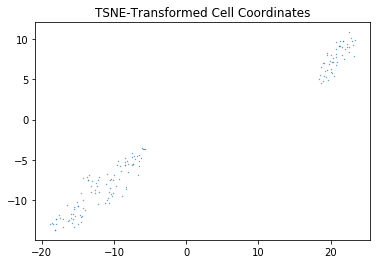

In [12]:
iftc = iris_forest.tsne()

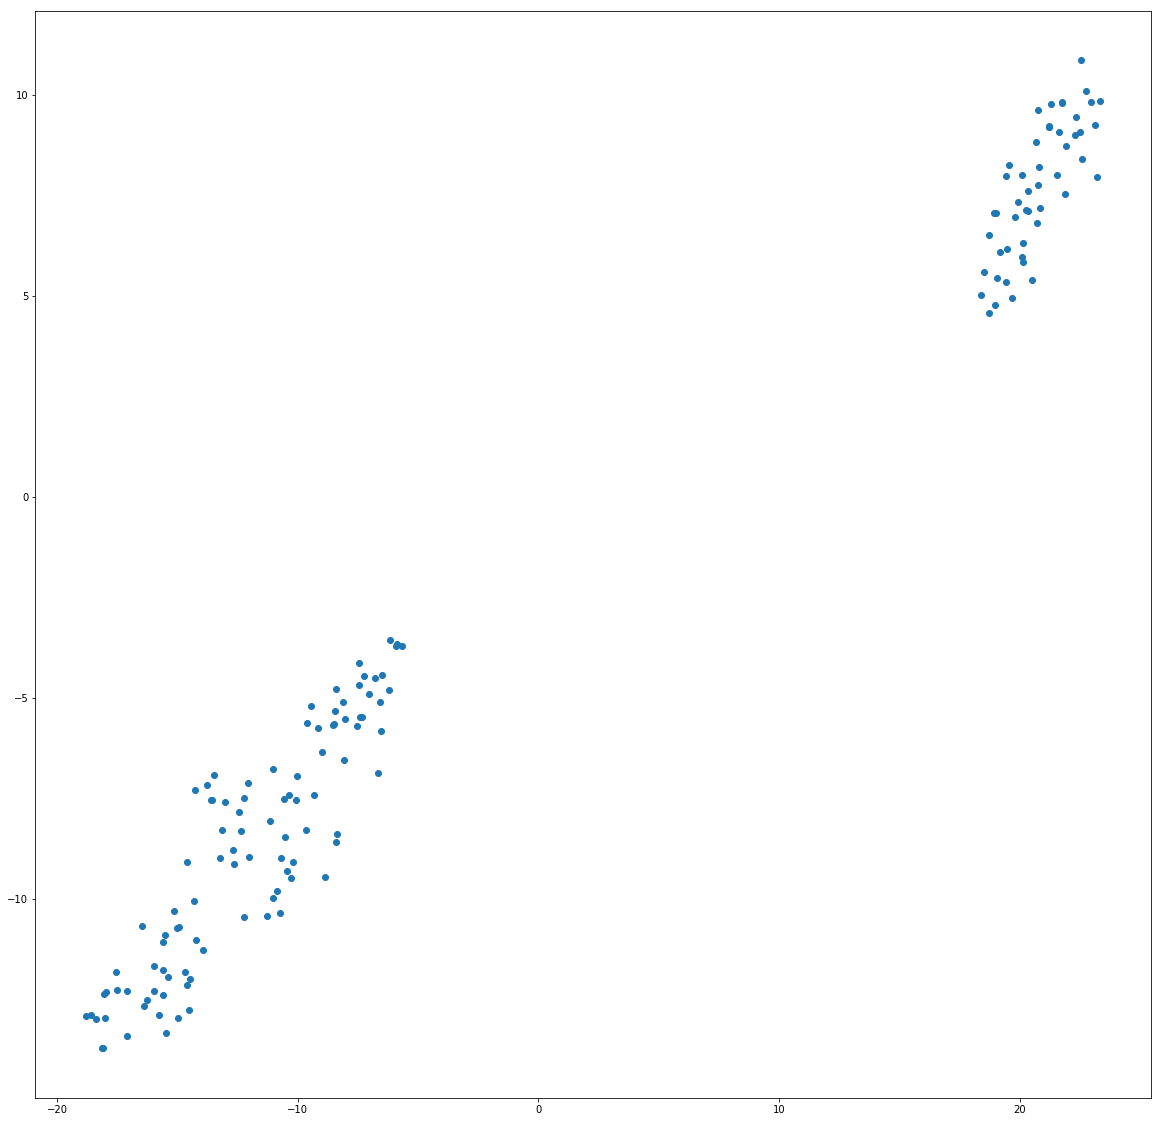

In [13]:
plt.figure(figsize=(20,20))
plt.scatter(iftc[:,0],iftc[:,1])
plt.show()

In [14]:
braids = trbr.IHMM(iris_forest,alpha_e=.5,beta_e=.5,start_states=5)

In [15]:
# print(braids.hidden_states[2].sample_log_odds)
# print(braids.hidden_states[1].sample_log_odds)
# print(braids.hidden_states[2].sample_log_odds)
# print(braids.hidden_states[3].sample_log_odds)
# print(braids.hidden_states[4].sample_log_odds)

In [16]:
# print(braids.hidden_states[0].sample_log_odds)
# print(braids.hidden_states[1].sample_log_odds)
# print(braids.hidden_states[2].sample_log_odds)
# print(braids.hidden_states[3].sample_log_odds)
# print(braids.hidden_states[4].sample_log_odds)
# print(braids.hidden_states[4].node_odds())

In [17]:
# [n.hidden_state for n in braids.nodes]

In [18]:
for i in range(500):
    print("+++++++++++++++++")
    print("ALPHA")
    print(braids.alpha)
    print("BETA")
    print(braids.beta)
    print("GAMMA")
    print(braids.gamma)
    print("+++++++++++++++++")
    braids.sweep()

# for hidden_state in range(braids.hidden_states):
#     print(np.sum(braids.state_masks[hidden_state]))
#     plt.figure(figsize=(20,20))
# #     plt.title(str(hidden_state.index))
#     plt.scatter(iftc[:,0],iftc[:,1],c=braids.lr_finite(hidden_state),cmap='bwr')
#     plt.show()
#     plt.figure()
#     plt.hist(hidden_state.node_odds())
#     plt.show()
    
# plt.figure()
# plt.imshow(braids.transition_counts,cmap='binary')
# plt.show()
    

+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
1
+++++++++++++++++
Sweep debug
5
[0 0 0 0 3 3 3 0 0 0 0 1 2 3 0 0 0 0 2 4 2 0 0 0 0 3 4 1 0 0 0 0 2 2 2 0 0
 0 0 1 1 2 0 0 0 0 4 1 3 0 0 0 0 4 3 1 0 0 0 0 1 4 4 0 0 0 0 2 3 4 0 0 0 0
 2 1 4 0 0 0 0 4 3 3 0 0 0 0 4 2 1 0 0 0 0 4 4 3 0 0 0 0 2 2 3 0 0 0 0 4 4
 1 0 0 0 0 3 2 3 0 0 0 0 2 4 4 0 0 0 0 4 4 2 0 0 0 0 2 1 4 0 0 0 0 3 2 3 0
 0 0 0 3 3 2 0 0 0 0 3 3 3 0 0 0 0 1 4 4 0 0 0 0 2 4 2 0 0 0 0 1 2 1 0 0 0
 0 2 3 2 0 0 0 0 1 2 3 0 0 0 0 2 4 4 0 0 0 0 4 2 1 0 0 0 0 2 2 2 0 0 0 0 4
 4 1 0 0 0 0 2 1 4 0 0 0 0 2 4 1 0 0 0 0 3 1 2 0 0 0 0 4 3 4 0 0 0 0 4 4 3
 0 0 0 0 2 1 4 0 0 0 0 4 2 4 0 0 0 0 2 4 1 0 0 0 0 2 3 4 0 0 0 0 4 1 3 0 0
 0 0 1 4 2 0 0 0 0 4 1 2 0 0 0 0 3 3 2 0 0 0 0 3 3 3 0 0 0 0 2 2 2 0 0 0 0
 3 2 1 0 0 0 0 1 1 1 0 0 0 0 2 1 1 0 0 0 0 1 4 1 0 0 0 0 2 4 3 0 0 0 0 1 4
 3 0 0 0 0 2 3 3 0 0 0 0 3 1 3 0 0 0 0 2 2 3 0 0 0 0 4 2 2 0 0 0 0 3 3 1 0
 0 0 0 1 4 2 0 0 0 0 2 2 2 0 0 0 0 3 1 2 0 0 0 0 3 1 1 0 0 0 0 4 3 3 0 0 0
 0 4 1 4 0 0 0 0 1 3 1 0 0 

/Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/src/tree_braider2.py:318: RuntimeWarning: divide by zero encountered in log2
  l2l = lambda g: (k * np.log2(g) - np.sum(log_sequence[g:oracle_total+g]))
/Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/src/tree_braider2.py:217: RuntimeWarning: divide by zero encountered in log2
  self.state_log_odds_given_child_l = np.log2(self.state_odds_given_child_l)
/Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/src/tree_braider2.py:218: RuntimeWarning: divide by zero encountered in log2
  self.state_log_odds_given_child_r = np.log2(self.state_odds_given_child_r)
/Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/src/tree_braider2.py:694: RuntimeWarning: invalid value encountered in true_divide
  oracle_probability_l = (oracle_state_odds_l / (oracle_state_odds_l + direct_state_odds_l))
/Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/src/tree_braider2.py:695: RuntimeWarning: invalid value encountered 

Computing oracle odds
[ 0.  1. 76.  1. 11.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 3 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0
 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0
 1 1 2 0 0 0 0 3 1 4 0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 1 3
 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0
 0 0 0 1 1 2 0 0 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0
 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1
 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2
 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0
 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0
 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1
 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 1 3 4 0 0 0 0 1 3 4 0
 0 0 0 3 1 2 0 0 0 0 3 3 2 0 0 0 0 3 1 2 0

Computing oracle odds
[ 0.  1. 77.  1. 11.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0
 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0
 3 1 2 0 0 0 0 3 1 4 0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 3 3
 2 0 0 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0
 0 0 0 1 1 2 0 0 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 4 2 0 0 0
 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 1
 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2
 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0
 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0
 1 1 2 0 0 0 0 3 1 2 0 0 0 0 3 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1
 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 3 3 4 0 0 0 0 1 3 4 0
 0 0 0 3 1 2 0 0 0 0 3 3 2 0 0 0 0 3 1 2 0

Computing oracle odds
[ 0.  1. 76.  1. 11.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0
 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0
 3 1 2 0 0 0 0 3 1 4 0 0 0 0 3 3 2 0 0 0 0 3 1 2 0 0 0 0 3 1 4 0 0 0 0 3 3
 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0
 0 0 0 1 1 2 0 0 0 0 3 3 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0
 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 3 3 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 1
 3 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2
 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0 0 3 3 2 0 0 0 0 3 1 2 0 0
 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0
 3 1 2 0 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1
 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 3 4 0 0 0 0 1 3 4 0
 0 0 0 3 1 2 0 0 0 0 3 3 2 0 0 0 0 3 1 2 0

+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 3 3 2 0 0 0 0 1 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0
 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0
 4 4 2 0 0 0 0 3 4 1 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4
 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0
 0 0 0 4 4 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0
 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4
 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2
 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 1 4 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0
 0 0 1 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0
 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4
 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2 0 0 0 0 4 4 2 0 0 0 0 3 3 1 0 0 0 0 3 3 1 0
 0 0 0 3 4 2 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0
 0 3 4 2 0 0 0 0 1 3 2 0 0 

+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 3 3 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0
 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0
 4 4 2 0 0 0 0 3 4 1 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 3 3
 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0
 0 0 0 4 4 2 0 0 0 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0
 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4
 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2
 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 1 4 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0
 0 0 1 3 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0
 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4
 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2 0 0 0 0 4 4 2 0 0 0 0 3 3 1 0 0 0 0 3 3 1 0
 0 0 0 3 4 2 0 0 0 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0
 0 3 4 2 0 0 0 0 4 3 2 0 0 

Computing oracle odds
[ 0. 11. 77.  1.  1.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 3 3 2 0 0 0 0 1 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0
 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0
 4 4 2 0 0 0 0 3 4 1 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 3 3
 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0
 0 0 0 4 4 2 0 0 0 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0
 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4
 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2
 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0
 0 0 1 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0
 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4
 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2 0 0 0 0 4 4 2 0 0 0 0 3 3 1 0 0 0 0 4 3 1 0
 0 0 0 3 4 2 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0

Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[ 0. 11. 77.  1.  1.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 1 3 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0
 0 0 1 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 1 3 2 0 0 0 0 1 4 2 0 0 0 0
 1 4 2 0 0 0 0 3 4 1 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2 0 0 0 0 3 4
 2 0 0 0 0 4 3 2 0 0 0 0 1 4 2 0 0 0 0 1 4 2 0 0 0 0 1 4 2 0 0 0 0 1 4 2 0
 0 0 0 4 4 2 0 0 0 0 3 3 2 0 0 0 0 1 4 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2 0 0 0
 0 3 4 2 0 0 0 0 1 4 2 0 0 0 0 1 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 1
 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2
 0 0 0 0 3 4 2 0 0 0 0 1 4 2 0 0 0 0 4 4 2 0 0 0 0 1 3 2 0 0 0 0 3 4 2 0 0
 0 0 4 3 2 0 0 0 0 1 4 2 0 0 0 0 1 4 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2 0 0 0 0
 3 4 2 0 0 0 0 3 4 2 0 0 0 0 1 3 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2 0 0 0 0 3 4
 2 0 0 0 0 3

Computing oracle odds
[ 0.  1. 76.  1. 11.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0
 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0
 1 1 2 0 0 0 0 3 1 4 0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 3 1 4 0 0 0 0 3 3
 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0
 0 0 0 1 1 2 0 0 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0
 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 1
 3 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2
 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0
 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0
 3 1 2 0 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1
 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 1 3 4 0 0 0 0 1 3 4 0
 0 0 0 3 1 2 0 0 0 0 3 3 2 0 0 0 0 3 1 2 0

Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[ 0. 11. 77.  1.  1.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 4 3 2 0 0 0 0 1 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0
 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0
 4 4 2 0 0 0 0 3 4 1 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 1 0 0 0 0 3 3
 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0
 0 0 0 4 4 2 0 0 0 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0
 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4
 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2
 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 1 4 2 0 0 0 0 3 3 2 0 0 0 0 4 4 2 0 0
 0 0 1 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0
 3 4 2 0 0 0 0 3 4 2 

Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[ 0. 11. 76.  1.  1.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 4 3 2 0 0 0 0 1 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0
 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0
 4 4 2 0 0 0 0 3 2 1 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 1 0 0 0 0 3 4
 2 0 0 0 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0
 0 0 0 4 4 2 0 0 0 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0
 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4
 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2
 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 1 4 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0
 0 0 1 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0
 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4
 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2 0 0 0 0 4 4 2 0 0 0 0 3 3 1 0 0 0

Computing oracle odds
[ 0. 11. 76.  1.  1.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 4 3 2 0 0 0 0 1 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0
 0 0 3 4 2 0 0 0 0 1 4 2 0 0 0 0 3 4 2 0 0 0 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0
 3 4 2 0 0 0 0 3 4 1 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 3 3
 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0
 0 0 0 1 4 2 0 0 0 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0
 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4
 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2
 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 1 4 2 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0 0
 0 0 1 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0
 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4
 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2 0 0 0 0 4 4 2 0 0 0 0 3 3 1 0 0 0 0 3 3 1 0
 0 0 0 3 4 2 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0

Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[ 0.  1. 76.  1.  9.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 1 3 2 0 0 0 0 4 4 2 0 0 0 0 1 4 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2 0 0
 0 0 1 4 2 0 0 0 0 1 4 2 0 0 0 0 3 4 2 0 0 0 0 1 3 2 0 0 0 0 1 4 2 0 0 0 0
 1 4 2 0 0 0 0 3 2 4 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0 0 0 0 3 1 4 0 0 0 0 3 3
 2 0 0 0 0 1 3 2 0 0 0 0 1 4 2 0 0 0 0 1 4 2 0 0 0 0 1 4 2 0 0 0 0 1 4 2 0
 0 0 0 4 4 2 0 0 0 0 3 3 2 0 0 0 0 1 4 2 0 0 0 0 3 4 2 0 0 0 0 4 1 2 0 0 0
 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 1 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4
 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 4 4 2
 0 0 0 0 3 4 2 0 0 0 0 1 4 2 0 0 0 0 4 4 2 0 0 0 0 1 3 2 0 0 0 0 3 4 2 0 0
 0 0 4 3 2 0 0 0 0 1 4 2 0 0 0 0 1 4 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2 0 0 0 0
 3 4 2 0 0 0 0 3 4 2 

Computing oracle odds
[ 0.  1. 77.  1. 11.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0
 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0
 3 1 2 0 0 0 0 1 1 4 0 0 0 0 3 3 2 0 0 0 0 3 1 2 0 0 0 0 3 1 4 0 0 0 0 3 3
 2 0 0 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0
 0 0 0 1 1 2 0 0 0 0 3 3 2 0 0 0 0 1 4 2 0 0 0 0 3 1 2 0 0 0 0 3 4 2 0 0 0
 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 3 3 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 1
 3 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2
 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0 0 3 3 2 0 0 0 0 3 1 2 0 0
 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0
 3 1 2 0 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1
 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 3 3 4 0 0 0 0 3 3 4 0
 0 0 0 3 1 2 0 0 0 0 3 3 2 0 0 0 0 3 1 2 0

Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[ 0. 11. 76.  1.  1.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 4 3 2 0 0 0 0 1 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0
 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0
 4 4 2 0 0 0 0 3 4 1 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 1 0 0 0 0 3 3
 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0
 0 0 0 4 4 2 0 0 0 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0
 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0 3 1 2 0 0 0 0 1
 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2
 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 1 4 2 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0 0
 0 0 1 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0
 4 4 2 0 0 0 0 3 1 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4
 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2 0 0 0 0 4 4 2 0 0 0 0 3 3 1 0 0 0

Computing oracle odds
[ 0. 11. 77.  1.  1.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0
 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0 0 0 0
 3 4 2 0 0 0 0 3 4 1 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 1 0 0 0 0 3 3
 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0
 0 0 0 4 4 2 0 0 0 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0
 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4
 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2
 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0 0
 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0
 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4
 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 3 3 1 0 0 0 0 3 3 1 0
 0 0 0 3 4 2 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0

Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[ 0.  1. 77.  1. 11.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0
 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0
 1 1 2 0 0 0 0 3 1 4 0 0 0 0 3 3 2 0 0 0 0 3 1 2 0 0 0 0 3 1 4 0 0 0 0 3 1
 2 0 0 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0
 0 0 0 1 1 2 0 0 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0
 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 1
 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2
 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0
 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0
 3 1 2 0 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 3 1
 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 3 3 4 0 0 0

Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[ 0.  1. 78.  1.  9.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 3 3 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0
 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0
 1 1 2 0 0 0 0 3 2 4 0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 3 3
 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0
 0 0 0 1 1 2 0 0 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0
 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 1
 3 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2
 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 3 3 2 0 0 0 0 3 1 2 0 0
 0 0 4 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0
 1 1 2 0 0 0 0 3 1 2 

Computing oracle odds
[ 0.  1. 76.  1. 11.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0
 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 4 3 2 0 0 0 0 3 1 2 0 0 0 0
 4 1 2 0 0 0 0 3 2 4 0 0 0 0 3 3 2 0 0 0 0 3 1 2 0 0 0 0 4 1 4 0 0 0 0 3 3
 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0
 0 0 0 4 1 2 0 0 0 0 3 3 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0
 0 3 3 2 0 0 0 0 4 1 2 0 0 0 0 4 3 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 1
 3 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2
 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 3 1 2 0 0
 0 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0
 3 1 2 0 0 0 0 3 1 2 0 0 0 0 4 3 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1
 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 3 3 4 0 0 0 0 4 3 4 0
 0 0 0 3 1 2 0 0 0 0 3 3 2 0 0 0 0 4 1 2 0

Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[ 0.  9. 76.  1.  1.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0
 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0
 3 4 2 0 0 0 0 3 2 1 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 1 0 0 0 0 3 3
 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0
 0 0 0 4 4 2 0 0 0 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0
 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4
 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2
 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0 0
 0 0 1 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0
 3 4 2 0 0 0 0 3 4 2 

Computing oracle odds
[ 0.  1. 76.  1. 10.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 1 3 2 0 0 0 0 4 4 2 0 0 0 0 3 1 2 0 0 0 0 1 4 2 0 0 0 0 3 4 2 0 0
 0 0 1 4 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0
 1 4 2 0 0 0 0 3 1 4 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0 0 0 0 3 1 4 0 0 0 0 3 3
 2 0 0 0 0 1 3 2 0 0 0 0 1 4 2 0 0 0 0 1 4 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0
 0 0 0 4 4 2 0 0 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 3 4 2 0 0 0 0 1 1 2 0 0 0
 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0 1 3 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 3
 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 4 4 2
 0 0 0 0 3 4 2 0 0 0 0 1 1 2 0 0 0 0 4 4 2 0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0
 0 0 4 3 2 0 0 0 0 1 4 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 1 4 2 0 0 0 0
 3 1 2 0 0 0 0 3 4 2 0 0 0 0 1 3 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2 0 0 0 0 3 1
 2 0 0 0 0 3 1 2 0 0 0 0 4 4 2 0 0 0 0 1 4 2 0 0 0 0 3 3 4 0 0 0 0 3 3 4 0
 0 0 0 3 4 2 0 0 0 0 3 3 2 0 0 0 0 1 1 2 0

Computing oracle odds
[ 0.  1. 77.  1. 10.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0
 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0
 1 1 2 0 0 0 0 3 1 4 0 0 0 0 3 3 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 3 3
 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0
 0 0 0 1 1 2 0 0 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0
 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 1
 3 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2
 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0
 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0
 3 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1
 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 3 3 4 0 0 0 0 1 3 4 0
 0 0 0 3 1 2 0 0 0 0 3 3 2 0 0 0 0 3 1 2 0

Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[ 0. 11. 77.  1.  1.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 4 3 2 0 0 0 0 1 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0
 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0
 4 4 2 0 0 0 0 3 4 1 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4
 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0
 0 0 0 4 4 2 0 0 0 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0
 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 1
 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2
 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 1 4 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0
 0 0 1 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0
 3 4 2 0 0 0 0 3 4 2 

Computing oracle odds
[ 0. 11. 77.  1.  1.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 3 3 2 0 0 0 0 1 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0
 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0
 4 4 2 0 0 0 0 3 4 1 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4
 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0
 0 0 0 4 4 2 0 0 0 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0
 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4
 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2
 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 1 4 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0
 0 0 1 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0
 3 4 2 0 0 0 0 4 4 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4
 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2 0 0 0 0 3 4 2 0 0 0 0 3 3 1 0 0 0 0 3 3 1 0
 0 0 0 3 4 2 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0

Computing oracle odds
[ 0. 11. 77.  1.  1.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 4 3 2 0 0 0 0 1 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0
 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0
 4 4 2 0 0 0 0 3 4 1 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4
 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0
 0 0 0 4 4 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2 0 0 0
 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4
 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2
 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 1 4 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0
 0 0 1 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0
 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4
 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2 0 0 0 0 4 4 2 0 0 0 0 3 3 1 0 0 0 0 3 3 1 0
 0 0 0 3 4 2 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0

Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[ 0. 11. 76.  1.  1.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 4 3 2 0 0 0 0 1 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0
 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0
 4 4 2 0 0 0 0 3 4 1 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 4 3
 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0
 0 0 0 4 4 2 0 0 0 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 1 2 0 0 0
 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4
 3 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2
 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0
 0 0 1 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0
 3 4 2 0 0 0 0 3 4 2 

Computing oracle odds
[ 0. 11. 75.  1.  1.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 3 3 2 0 0 0 0 1 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0
 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0
 3 4 2 0 0 0 0 3 4 1 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 1 0 0 0 0 3 3
 2 0 0 0 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0
 0 0 0 4 4 2 0 0 0 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0
 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4
 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2
 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 1 4 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0
 0 0 1 3 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0
 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4
 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2 0 0 0 0 3 4 2 0 0 0 0 3 3 1 0 0 0 0 3 3 1 0
 0 0 0 3 4 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0

Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[ 0. 11. 77.  1.  1.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 3 3 2 0 0 0 0 1 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0
 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0 0 0 0
 3 4 2 0 0 0 0 3 4 1 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4
 2 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0
 0 0 0 1 4 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0
 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 3
 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2
 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 1 4 2 0 0 0 0 3 3 2 0 0 0 0 4 4 2 0 0
 0 0 1 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0
 3 4 2 0 0 0 0 4 4 2 

Computing oracle odds
[ 0. 11. 77.  1.  1.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 3 3 2 0 0 0 0 1 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0
 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0
 3 4 2 0 0 0 0 3 4 1 0 0 0 0 3 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 1 0 0 0 0 4 4
 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0
 0 0 0 3 4 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0
 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 3
 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2
 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 1 4 2 0 0 0 0 3 3 2 0 0 0 0 4 4 2 0 0
 0 0 3 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0
 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4
 2 0 0 0 0 4 4 2 0 0 0 0 1 4 2 0 0 0 0 4 4 2 0 0 0 0 3 3 1 0 0 0 0 3 3 1 0
 0 0 0 3 4 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0

/Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/src/tree_braider2.py:201: RuntimeWarning: invalid value encountered in multiply
  self.state_odds_given_oracle_l = self.oracle_odds_given_child_l * self.oracle_odds
/Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/src/tree_braider2.py:644: RuntimeWarning: invalid value encountered in less
  draw_index = np.sum(descending_odds[:,live_mask] < np.tile(draws,(descending_odds.shape[0],1)),axis=0)


Computing State Masks
Recomputing Sample Log Odds
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[ 0.  7. 79.  1.  3.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 1 3 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2 0 0 0 0 4 4 2 0 0 0 0 1 4 2 0 0
 0 0 1 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 1 3 2 0 0 0 0 1 4 2 0 0 0 0
 1 4 2 0 0 0 0 1 2 1 0 0 0 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0 1 4 2 0 0 0 0 4 4
 2 0 0 0 0 1 3 2 0 0 0 0 1 4 2 0 0 0 0 4 4 2 0 0 0 0 1 4 2 0 0 0 0 1 4 2 0
 0 0 0 3 4 2 0 0 0 0 4 3 2 0 0 0 0 1 4 2 0 0 0 0 4 4 2 0 0 0 0 1 4 2 0 0 0
 0 4 3 2 0 0 0 0 1 4 2 0 0 0 0 1 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4
 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 1 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2
 0 0 0 0 1 4 2 0 0 0 0 1 4 2 0 0 0 0 3 4 2 0 0 0 0 1 3 2 0 0 0 0 4 4 2 0 0
 0 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0

Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[ 0.  3. 79.  1.  7.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0
 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 4 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 3
 2 0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0
 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 1 4 2 0 0 0 0 4 1 2 0 0 0 0 1 4 2 0 0 0
 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0 0 1
 3 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2
 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0
 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0
 1 1 2 0 0 0 0 4 1 2 

Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[ 0.  1. 77.  1. 10.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 4 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0
 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 4 1 2 0 0 0 0
 4 1 2 0 0 0 0 3 1 4 0 0 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1
 2 0 0 0 0 4 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0
 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 4 2 0 0 0
 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3
 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2
 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0
 0 0 3 3 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0 0 3 3 4 0 0 0

Computing oracle odds
[ 0.  1. 79.  1.  9.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0
 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 4 0 0 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 3
 2 0 0 0 0 4 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0
 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 3 4 2 0 0 0
 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4
 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2
 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0
 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 3 4 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 3 3 4 0 0 0 0 3 3 4 0
 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0

Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[ 0.  1. 75.  1. 11.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 4 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0
 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 4 1 2 0 0 0 0
 4 1 2 0 0 0 0 3 2 4 0 0 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1
 2 0 0 0 0 4 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0
 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0
 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1
 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2
 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0
 0 0 3 3 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0
 3 1 2 0 0 0 0 1 1 2 

Computing oracle odds
[ 0.  1. 76.  1. 11.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0
 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0
 3 1 2 0 0 0 0 1 1 4 0 0 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 4 0 0 0 0 1 3
 2 0 0 0 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0
 0 0 0 4 1 2 0 0 0 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 4 2 0 0 0
 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4
 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2
 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0
 0 0 3 3 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 3 3 4 0 0 0 0 3 3 4 0
 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0

Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[ 0.  1. 76.  1. 11.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0
 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 4 1 2 0 0 0 0
 4 1 2 0 0 0 0 1 1 4 0 0 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 4 0 0 0 0 1 3
 2 0 0 0 0 3 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0
 0 0 0 4 1 2 0 0 0 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 4 2 0 0 0
 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4
 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2
 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0
 0 0 3 3 2 0 0 0 0 4 1 2 0 0 0 0 4 4 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 3 3 4 0 0 0

Computing oracle odds
[ 0.  1. 77.  1. 11.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 4 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0
 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0
 3 1 2 0 0 0 0 1 1 4 0 0 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 3
 2 0 0 0 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 4 4 2 0
 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 4 2 0 0 0
 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3
 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2
 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0
 0 0 3 3 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0 0 3 3 4 0 0 0 0 1 3 4 0
 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 4 1 2 0

Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[ 0.  1. 77.  1. 11.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 4 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0
 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 4 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 4 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 3
 2 0 0 0 0 4 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0
 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0
 0 4 3 2 0 0 0 0 4 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4
 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2
 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0
 0 0 3 3 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 

Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[ 0.  1. 77.  1. 11.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 4 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0
 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 4 1 2 0 0 0 0
 4 1 2 0 0 0 0 1 1 4 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 4 1 4 0 0 0 0 1 3
 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0
 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 4 4 2 0 0 0 0 1 1 2 0 0 0 0 4 4 2 0 0 0
 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1
 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2
 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0
 0 0 3 3 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 3 3 4 0 0 0

Computing oracle odds
[ 0.  1. 76.  1. 10.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 4 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0
 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 4 1 2 0 0 0 0
 4 1 2 0 0 0 0 3 1 4 0 0 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 4 1 4 0 0 0 0 1 3
 2 0 0 0 0 4 3 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0
 0 0 0 4 1 2 0 0 0 0 1 3 2 0 0 0 0 4 4 2 0 0 0 0 1 1 2 0 0 0 0 4 4 2 0 0 0
 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4
 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2
 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0
 0 0 3 3 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0 0 3 3 4 0 0 0 0 3 3 4 0
 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0

Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[ 0.  1. 75.  1. 11.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 4 3 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0
 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 4 1 2 0 0 0 0
 4 1 2 0 0 0 0 3 1 4 0 0 0 0 3 3 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1
 2 0 0 0 0 4 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0
 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0
 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3
 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2
 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0
 0 0 3 3 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0
 4 1 2 0 0 0 0 1 1 2 

Computing oracle odds
[ 0. 11. 77.  1.  1.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 1 3 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 1 4 2 0 0 0 0 4 4 2 0 0
 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0
 4 4 2 0 0 0 0 3 4 1 0 0 0 0 3 3 2 0 0 0 0 1 4 2 0 0 0 0 4 4 1 0 0 0 0 1 3
 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0
 0 0 0 4 4 2 0 0 0 0 1 3 2 0 0 0 0 4 4 2 0 0 0 0 1 4 2 0 0 0 0 4 4 2 0 0 0
 0 1 3 2 0 0 0 0 4 4 2 0 0 0 0 4 3 2 0 0 0 0 1 4 2 0 0 0 0 1 1 2 0 0 0 0 4
 3 2 0 0 0 0 1 4 2 0 0 0 0 1 4 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2
 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 3 2 0 0 0 0 1 4 2 0 0
 0 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0
 4 4 2 0 0 0 0 1 4 2 0 0 0 0 4 3 2 0 0 0 0 1 4 2 0 0 0 0 4 4 2 0 0 0 0 1 4
 2 0 0 0 0 1 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 3 1 0 0 0 0 4 3 1 0
 0 0 0 1 4 2 0 0 0 0 1 3 2 0 0 0 0 4 4 2 0

Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 1 3 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0
 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0
 3 4 2 0 0 0 0 4 4 1 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 1 0 0 0 0 4 3
 2 0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0
 0 0 0 3 4 2 0 0 0 0 4 3 2 0 0 0 0 1 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0
 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 1
 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2
 0 0 0 0 4 4 2 0 0 0 0 1 4 2 0 0 0 0 3 4 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0
 0 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0
 4 4 2 0 0 0 0 4 4 2 0 0 0 0 1 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4
 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 1 4 2 0 0 0 0 3 3 1 0 0 0 0 4 3 1 0
 0 0 0 4 4 2 0 0 0 0 4 3 2 0 0 0 0 1 4 2 0 0 0 0 1 4 2 0 0 0 0 4 4 2 0 0 0
 0 4 3 2 0 

Computing oracle odds
[ 0. 11. 77.  1.  1.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 1 4 2 0 0
 0 0 1 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 1 3 2 0 0 0 0 1 4 2 0 0 0 0
 1 4 2 0 0 0 0 3 2 1 0 0 0 0 3 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 3
 2 0 0 0 0 4 3 2 0 0 0 0 1 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0
 0 0 0 3 4 2 0 0 0 0 4 3 2 0 0 0 0 1 4 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0
 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 1
 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 1 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2
 0 0 0 0 4 4 2 0 0 0 0 1 4 2 0 0 0 0 3 4 2 0 0 0 0 1 3 2 0 0 0 0 4 4 2 0 0
 0 0 3 3 2 0 0 0 0 1 4 2 0 0 0 0 1 4 2 0 0 0 0 3 4 2 0 0 0 0 3 4 2 0 0 0 0
 4 4 2 0 0 0 0 4 4 2 0 0 0 0 1 3 2 0 0 0 0 4 4 2 0 0 0 0 1 4 2 0 0 0 0 4 4
 2 0 0 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 4 4 2 0 0 0 0 3 3 1 0 0 0 0 3 3 1 0
 0 0 0 4 4 2 0 0 0 0 4 3 2 0 0 0 0 1 4 2 0

Computing State Masks
Recomputing Sample Log Odds
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[ 0.  1. 77.  1. 11.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 4 3 2 0 0 0 0 3 4 2 0 0 0 0 4 1 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0
 0 0 4 4 2 0 0 0 0 3 4 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 4 1 2 0 0 0 0
 1 4 2 0 0 0 0 3 1 4 0 0 0 0 1 3 2 0 0 0 0 4 4 2 0 0 0 0 1 1 4 0 0 0 0 4 3
 2 0 0 0 0 4 3 2 0 0 0 0 1 4 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 4 2 0
 0 0 0 1 4 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 4 4 2 0 0 0 0 3 1 2 0 0 0
 0 4 3 2 0 0 0 0 1 4 2 0 0 0 0 4 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 1
 3 2 0 0 0 0 4 4 2 0 0 0 0 4 4 2 0 0 0 0 1 4 2 0 0 0 0 3 1 2 0 0 0 0 3 4 2
 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3 4 2 0 0 0 0 1 3 2 0 0 0 0 4 1 2 0 0
 0 0 3 3 2 0 0 0 0 1 4 2 0 0 0 0 1 1 2 0 0 0 0

Computing oracle odds
[ 0.  1. 76.  1. 10.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 4 3 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0
 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0
 3 1 2 0 0 0 0 3 2 4 0 0 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 3 1 4 0 0 0 0 1 3
 2 0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0
 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3 4 2 0 0 0
 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1
 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2
 0 0 0 0 1 1 2 0 0 0 0 4 4 2 0 0 0 0 3 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0
 0 0 3 3 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0
 1 1 2 0 0 0 0 4 1 2 0 0 0 0 3 3 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0 0 3 3 4 0 0 0 0 3 3 4 0
 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 4 1 2 0

Computing oracle odds
[ 0.  1. 78.  1.  9.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0
 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 4 1 2 0 0 0 0
 4 1 2 0 0 0 0 1 1 4 0 0 0 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0
 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 4 4 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0
 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4
 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2
 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0
 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0 0 1 3 4 0 0 0 0 4 3 4 0
 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0

Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[ 0.  1. 79.  1.  9.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0
 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0
 4 1 2 0 0 0 0 1 1 4 0 0 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 3
 2 0 0 0 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0
 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0
 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4
 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2
 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0
 0 0 3 3 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 

Computing oracle odds
[ 0.  1. 77.  1. 11.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 4 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0
 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 4 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 4 0 0 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 4 0 0 0 0 1 1
 2 0 0 0 0 4 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0
 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0
 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1
 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2
 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0
 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 3 3 4 0 0 0 0 4 3 4 0
 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0

Computing oracle odds
[ 0.  1. 77.  1. 11.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 4 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0
 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 4 1 2 0 0 0 0
 1 1 2 0 0 0 0 3 1 4 0 0 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 4 0 0 0 0 1 1
 2 0 0 0 0 4 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0
 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 4 2 0 0 0
 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1
 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2
 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0
 0 0 3 3 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0
 3 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0 0 3 3 4 0 0 0 0 1 3 4 0
 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0

Computing oracle odds
[ 0.  1. 76.  1. 11.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0
 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0
 3 1 2 0 0 0 0 1 1 4 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 4 0 0 0 0 1 1
 2 0 0 0 0 4 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0
 0 0 0 4 1 2 0 0 0 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0
 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1
 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2
 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0
 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 3 3 4 0 0 0 0 4 3 4 0
 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 4 1 2 0

Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:1
Gamma:2
Computing state log odds | divergence
Computing oracle odds
[ 0.  1. 77.  1. 11.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 4 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0
 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0
 4 1 2 0 0 0 0 3 1 4 0 0 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 3 1 4 0 0 0 0 1 3
 2 0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0
 0 0 0 4 1 2 0 0 0 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0
 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4
 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2
 0 0 0 0 1 1 2 0 0 0 0 4 4 2 0 0 0 0 3 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0
 0 0 3 3 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 

Computing oracle odds
[ 0.  1. 77.  1. 11.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0
 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 4 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 4 0 0 0 0 1 3
 2 0 0 0 0 4 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0
 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0
 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4
 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2
 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0
 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0 0 3 3 4 0 0 0 0 1 3 4 0
 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0

Computing oracle odds
[ 0.  1. 79.  1.  9.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0
 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 4 1 2 0 0 0 0
 4 1 2 0 0 0 0 3 1 4 0 0 0 0 3 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 1 3
 2 0 0 0 0 4 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0
 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 4 2 0 0 0
 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1
 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2
 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0
 0 0 3 3 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0
 3 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0 0 3 3 4 0 0 0 0 3 3 4 0
 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0

Computing oracle odds
[ 0.  1. 76.  1. 11.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0
 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0
 4 1 2 0 0 0 0 1 1 4 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 3
 2 0 0 0 0 4 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0
 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0
 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3
 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2
 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0
 0 0 3 3 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0 0 3 3 4 0 0 0 0 3 3 4 0
 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0

Computing oracle odds
[ 0.  1. 77.  1. 11.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0
 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 2 4 0 0 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 4 0 0 0 0 1 3
 2 0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0
 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 4 4 2 0 0 0 0 1 1 2 0 0 0 0 3 4 2 0 0 0
 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4
 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2
 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0
 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 3 4 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 3 3 4 0 0 0 0 3 3 4 0
 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0

Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 4 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0
 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 4 3 2 0 0 0 0 4 1 2 0 0 0 0
 4 1 2 0 0 0 0 1 2 4 0 0 0 0 4 3 2 0 0 0 0 4 1 2 0 0 0 0 4 1 4 0 0 0 0 1 3
 2 0 0 0 0 4 3 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0
 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0
 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4
 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2
 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0
 0 0 3 3 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 3 4 0 0 0 0 3 3 4 0
 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0
 0 4 1 2 0 

Computing oracle odds
[ 0.  1. 76.  1. 10.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 1 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0
 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0
 4 1 2 0 0 0 0 3 1 4 0 0 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 3 1 4 0 0 0 0 1 1
 2 0 0 0 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0
 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 4 4 2 0 0 0 0 1 1 2 0 0 0 0 3 4 2 0 0 0
 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4
 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2
 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0
 0 0 3 3 2 0 0 0 0 4 1 2 0 0 0 0 4 4 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0 0
 3 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 3 4 2 0 0 0 0 1 1 2 0 0 0 0 3 3 4 0 0 0 0 3 3 4 0
 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0

Computing oracle odds
[ 0.  1. 77.  1. 11.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 4 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0
 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 4 3 2 0 0 0 0 4 1 2 0 0 0 0
 4 1 2 0 0 0 0 3 1 4 0 0 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 3
 2 0 0 0 0 4 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0
 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0
 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3
 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2
 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0
 0 0 3 3 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0 0 3 3 4 0 0 0 0 3 3 4 0
 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0

Computing oracle odds
[ 0.  1. 75.  1. 11.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 4 3 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0
 0 0 3 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 4 1 2 0 0 0 0
 4 1 2 0 0 0 0 3 1 4 0 0 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 3
 2 0 0 0 0 4 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0
 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 4 2 0 0 0
 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4
 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 3 1 2
 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0
 0 0 3 3 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 3 3 4 0 0 0 0 3 3 4 0
 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0

Computing oracle odds
[ 0.  1. 74.  1. 11.]
Sampling states
+++++++++++++++++
ALPHA
1
BETA
1
GAMMA
2
+++++++++++++++++
Sweep debug
5
[0 0 0 0 4 3 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0
 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 4 1 2 0 0 0 0
 4 1 2 0 0 0 0 1 2 4 0 0 0 0 3 3 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 1 3
 2 0 0 0 0 4 3 2 0 0 0 0 3 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0
 0 0 0 3 1 2 0 0 0 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0
 0 1 3 2 0 0 0 0 4 1 2 0 0 0 0 1 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 3
 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2
 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0 3 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0
 0 0 3 3 2 0 0 0 0 4 1 2 0 0 0 0 4 1 2 0 0 0 0 1 1 2 0 0 0 0 4 1 2 0 0 0 0
 1 1 2 0 0 0 0 1 1 2 0 0 0 0 4 3 2 0 0 0 0 1 1 2 0 0 0 0 1 1 2 0 0 0 0 1 1
 2 0 0 0 0 1 1 2 0 0 0 0 3 1 2 0 0 0 0 4 1 2 0 0 0 0 3 3 4 0 0 0 0 1 3 4 0
 0 0 0 1 1 2 0 0 0 0 1 3 2 0 0 0 0 4 1 2 0

In [19]:
braids.backup('./test.remove_later')

In [21]:
braids = trbr.IHMM.reconstitute('./test.remove_later')

In [ ]:
# braids.update_node_relations()

In [ ]:
# braids.child_state_l[braids.live_mask]

In [ ]:
# plt.figure()
# plt.imshow(braids.recompute_state_masks(braids.node_states)[:,braids.live_mask],cmap='binary',aspect='auto')
# plt.show()

In [ ]:
plt.figure()
plt.imshow(braids.most_likely_parent_to_child(),cmap='binary')
plt.show()
# braids.state_masks.shape

# for i in range(300):
#     braids.sweep()

# for i in range(300):
#     braids.sample_states()

# plt.figure()
# plt.imshow(sweep,aspect='auto')
# plt.show()

# print(str(list(sweep)))
# print(sweep.shape)

In [ ]:
# braids.node_states[braids.live_mask]
# braids.sweep()

In [ ]:
# plt.figure(figsize=(10,10))
# plt.scatter(iftc[:,0],iftc[:,1],s=3,c=braids.lr_finite(3),cmap='bwr')
# plt.show()

plt.figure(figsize=(10,10))
plt.scatter(iftc[:,0],iftc[:,1],s=3,c=braids.hidden_states[3].lr_finite(),cmap='bwr')
plt.show()


In [ ]:
braids.most_likely_parent_to_child()

In [ ]:
braids.max_likelihood_sweep()